### Today's live lecture is based on an old discussion activity



# Finding a Path Through a Maze

### Group Names and Roles

- Partner 1 (Role)
- Partner 2 (Role)
- Partner 3 (Role)

Don't forget to *rotate your roles*. The Driver from last time is now the Proposer, the Proposer from last time is now the Reviewer, and the Reviewer from last time is now the Driver. 

Additionally, don't forget that **it's ok not to finish the worksheet.** Just do your best, work on it for approximately 50 minutes, and turn it in. If you'd like to set up some time to finish it up with your group mates, that's great and will help you learn. If not, no worries! 

## Introduction 

In this activity, we'll write a program to find a path through the maze below. (**Walls** are yellow, and **passable space** is purple.) 

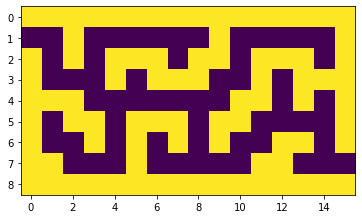

We start the maze in the empty space at `(1, 0)` -- where we write the **row first**, followed by the column. At each step, we can move up, down, left, or right, but not diagonally. Our goal is to come out of the other side of the maze at `(7, 15)`.

Start by running the next cell.

In [5]:
from matplotlib import pyplot as plt
import copy

In the above two lines, we are importing the modules we'll use for our program. `pyplot` from `matplotlib` will allow us to draw a picture of our maze, just like the one above. We will explain why we need `copy` once we get there.

Now, go ahead and run the following:

In [1]:
maze_str = """
++++++++++++++++
  +      +     +
+ + +++ ++ +++ +
+   + +++  + +++
+++       ++ + +
+ ++ +++ ++    +
+  + + + +  ++ +
++   +     ++   
++++++++++++++++
    """
start = (1, 0)
end = (7, 15)


`maze_str` is a string representation of the maze from the picture above; `+` is a wall and a single space character is passable space. Note that triple quotes are used to define a string across multiple lines. `start` and `end` are the positions for where we start and where we want to end up in the maze, as explained in the beginning.

## §A. Write `build_maze()`




In the code cell below, declare and implement the `build_maze` function. The function needs to take a string like `maze_str` and turn it into a two-dimensional list of integers (list of lists of integers), where the inner lists are rows of wall or empty space, `0` is empty space, and `1` is a wall.

For instance, the list `[[1, 1, 1], [1, 1, 0], [1, 1, 1]]` would represent a 3x3 block of walls with an empty space carved out in the middle right.

The function `build_maze` ought to take around 6 lines.

**Note**: before you split the maze string across lines, you should call `.strip()` on it -- this will trim the whitespace from the ends of it.

***Hint***: Use `str.split("\n")` to parse `maze_str` line-by-line. 
***Hint***: Recall that `L[-1]` refers to the final element of a list `L`. 

In [10]:
for x in maze_str.split("\n"):
    print(x)


++++++++++++++++
  +      +     +
+ + +++ ++ +++ +
+   + +++  + +++
+++       ++ + +
+ ++ +++ ++    +
+  + + + +  ++ +
++   +     ++   
++++++++++++++++
    


In [15]:
# your code here
def build_maze(maze_str):
    maze=[]
    for line in maze_str.strip().split("\n"):
        maze.append([])
        for char in line:
            maze[-1].append(1 if char=='+' else 0)#
            #the above line is short hand for 
            #if char=='+':
            #    maze[-1].append(1)
            #else:
            #    maze[-1].append(0)
    return maze
maze=build_maze(maze_str)
maze

[[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
 [0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1],
 [1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1],
 [1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1],
 [1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1],
 [1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1],
 [1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1],
 [1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0],
 [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]]

## §B. Build and plot your maze. 

Run the code below to build and plot your maze. All you need to do for this part is press enter. (If your code from part A is correct, you should produce a picture identical to the one at the top.)

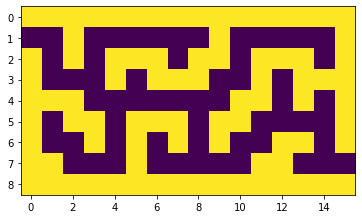

In [16]:
def plot_maze(maze):
    '''
    plt is shorthand for the matplotlib package we will learn about later in the course
    imshow is used for displaying 2D Images
    '''
    plt.imshow(maze)
    
maze = build_maze(maze_str)
plot_maze(maze)


## §C. Write `choose_valid_move()`. 

In the next part, we will implement a `solve_maze()` function. Here's the idea: 

- Declare a list called `path` that keeps track of the path, containing only the tuple `start`. The last element of this list is your "current position". 
- In a loop:
    - Replace the square in the maze at your current position with `2` -- a visited square. 
    - Then look for any adjacent square that you can move to which has not yet been visited. If there are no such squares, backtrack (throw away elements from the end of the path).

**We will implement the above idea in part D. In this part, we will write a helper function called choose_valid_move.**  This function should take two inputs maze and pos, which store the maze and the current position. It should return a tuple called new which satisfies two criteria: i) new is adjacent to pos ii) there is not a wall at pos. If there is no valid move, your function should return None. My solution took exactly 5 lines, but it is okay if yours is different. 

**Note:** there are many ways to implement this function. It's sufficient for your function to choose *any* valid move. If there are multiple, you can pick one at random, always choose the first one you see, or any other approach.

In [17]:
# your code here
def choose_valid_move(maze,pos):
    #think outloud
    #new should equal pos + (0,1) or pos +(1,0) or pos + (-1,0) or pos + (0,-1)
    for d in [(0,1),(1,0),(0,-1),(-1,0)]:
        new = (pos[0]+d[0],pos[1]+d[1])
        if maze[new[0]][new[1]]==0:
            return new
    return None

---

If you've made it this far, great job! If there are more than 5 minutes left in Discussion, go ahead and continue on to the remaining parts, in which you'll use your functions from above to fully solve the maze. Otherwise, feel free to submit your worksheet. Finding some time to work with your group to complete the worksheet is optional but heartily recommended. 

---

## §D. Write `solve_maze()`. 

Using the `choose_valid_move()` function that from above, write the `solve_maze` function according to the outline in §C.

**Important technicality:** In order to mark the spaces already visited, you have to change the `maze` object passed to the function. Because lists are mutable, this will end up changing the original maze, which we want to avoid. In situations like this, the key is to make a copy. Normally, the syntax for this would be `myMaze=maze.copy()`. However, since maze is a list of lists, it is actually a *compound mutable object*. Therefore, the first line of your function should be `myMaze = copy.deepcopy(maze)`. 

Fill in the function below. It should take around 10-12 lines, not counting whitespace.

In [26]:
# your code here
def solve_maze(maze,start,end):
    myMaze=copy.deepcopy(maze)
    
    path = [start]
    #what type of loop for or while 
    #we want a while loop 
    #dont know how many steps we need to solve the maze
    
    while path[-1]!=end:
        myMaze[path[-1][0]][path[-1][1]]=2
        next_pos=choose_valid_move(myMaze,path[-1])
        if next_pos and next_pos not in path:
            path.append(next_pos)
        else:
            path=path[:-1]
    return path
        

After you write your function, run the line below:

In [27]:
path = solve_maze(maze, start, end)

## §E. Write `plot_maze_solution()`. 

Lastly, write the `plot_maze_solution()` function in the code cell below. The function ought to take a maze and a path as arguments. You should then mark the squares along the path with value `2`. After you've done this, call `plot_maze()` on the marked maze. Remember to make a deep copy of the maze again, just as above, since otherwise you would be changing the original list that is passed as an argument to the function. This function ought to take around 4 lines.

In [28]:
# your code here
def plot_maze_solution(maze,path):
    myMaze=copy.deepcopy(maze)
    for pos in path:
        myMaze[pos[0]][pos[1]]=2
    plt.imshow(myMaze)

After you are done, run the line below to look at your solution. 

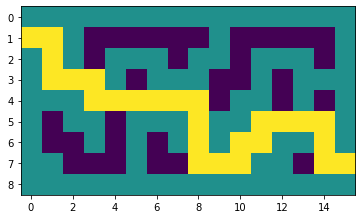

In [29]:
plot_maze_solution(maze, path)